In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statistics import mean

In [18]:
df = pd.read_excel('wage.xlsx')

In [19]:
df.head(10)

,id,nearc2,nearc4,educ,age,fatheduc,motheduc,weight,momdad14,sinmom14,...,smsa66,wage,enroll,KWW,IQ,married,libcrd14,exper,lwage,expersq
0,2,0,0,7,29,NaN,NaN,158413,1,0,...,1,548,0,15.0,NaN,1.0,0.0,16,6.306275,256
1,3,0,0,12,27,8.0,8.0,380166,1,0,...,1,481,0,35.0,93.0,1.0,1.0,9,6.175867,81
2,4,0,0,12,34,14.0,12.0,367470,1,0,...,1,721,0,42.0,103.0,1.0,1.0,16,6.580639,256
3,5,1,1,11,27,11.0,12.0,380166,1,0,...,1,250,0,25.0,88.0,1.0,1.0,10,5.521461,100
4,6,1,1,12,34,8.0,7.0,367470,1,0,...,1,729,0,34.0,108.0,1.0,0.0,16,6.591674,256
5,7,1,1,12,26,9.0,12.0,380166,1,0,...,1,500,0,38.0,85.0,1.0,1.0,8,6.214608,64
6,8,1,1,18,33,14.0,14.0,367470,1,0,...,1,565,0,41.0,119.0,1.0,1.0,9,6.336826,81
7,9,1,1,14,29,14.0,14.0,496635,1,0,...,1,608,0,46.0,108.0,1.0,1.0,9,6.410175,81
8,10,1,1,12,28,12.0,12.0,367772,1,0,...,1,425,0,32.0,96.0,4.0,0.0,10,6.052089,100
9,11,1,1,12,29,12.0,12.0,480445,1,0,...,1,515,0,34.0,97.0,1.0,1.0,11,6.244167,121


In [20]:
df.shape

(3010, 34)

In [21]:
nan_values = df.isnull()
nan_columns = nan_values.any()
columns_with_nan = df.columns[nan_columns]
for i in columns_with_nan:
    print(i, df[i].isnull().sum())

fatheduc 690
motheduc 353
KWW 47
IQ 949
married 7
libcrd14 13


In [22]:
#Find all column with 'reg66' 
reg66 = df.columns[df.columns.str.contains('reg66')].tolist()
regSum = [sum(df[df[reg] == 1].wage.tolist()) for reg in reg66]
reg66.append('south66')
regSum.append(sum(df[df['south66'] == 1].wage.tolist()))
regDict = dict(zip(reg66, regSum))

In [23]:
regLen = [len(df[df[reg] == 1].wage.tolist()) for reg in reg66]
regLen,sum(regLen), sum(regLen[:-1])

([140, 484, 589, 193, 627, 289, 331, 85, 272, 1247], 4257, 3010)

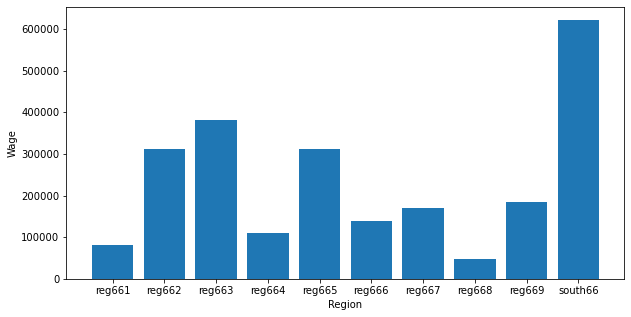

In [24]:
plt.figure(figsize=(10,5))
plt.bar(regDict.keys(), regDict.values())
plt.xlabel('Region')
plt.ylabel('Wage')
plt.show()

In [25]:
southReg = []
reg66_2 = reg66[:]
reg66_2.remove('south66')
regSum_2 = regSum[:]
del regSum_2[-1]
regDict2 = dict(zip(reg66_2, regSum_2))
for reg in reg66_2:
    for i in zip(df[reg], df['south66']):
        if i == (1,1):
            southReg.append(reg)
countSouthReg = dict()
for w in southReg:
    countSouthReg[w] = countSouthReg.get(w, 0) + 1
countSouthReg = dict(sorted(countSouthReg.items()))

sum(countSouthReg.values()), countSouthReg
            

(1247, {'reg665': 627, 'reg666': 289, 'reg667': 331})

In [26]:
lst = []
dfNew = df.loc[:,'reg661':'south66'].values.tolist()
for i in dfNew:
    if i[-1] == 1 and np.count_nonzero(i) == 1:
        lst.append(i)

lst


[]

In [27]:
df[df['south66'] == 1].loc[:,'reg661':'south66']

,reg661,reg662,reg663,reg664,reg665,reg666,reg667,reg668,reg669,south66
948,0,0,0,0,1,0,0,0,0,1
1406,0,0,0,0,0,0,1,0,0,1
1407,0,0,0,0,0,0,1,0,0,1
1408,0,0,0,0,0,0,1,0,0,1
1409,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
3005,0,0,0,0,0,1,0,0,0,1
3006,0,0,0,0,0,1,0,0,0,1
3007,0,0,0,0,0,1,0,0,0,1
3008,0,0,0,0,0,1,0,0,0,1


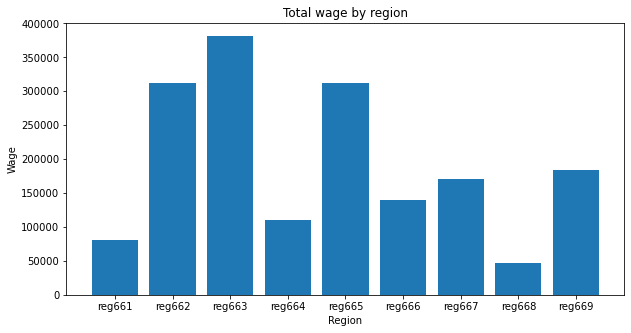

In [37]:
plt.figure(figsize=(10,5))
plt.bar(regDict2.keys(), regDict2.values())
plt.title('Total wage by region')
plt.xlabel('Region')
plt.ylabel('Wage')
plt.show()

In [31]:
regMean = [mean(df[df[reg] == 1].wage.tolist()) for reg in reg66_2]

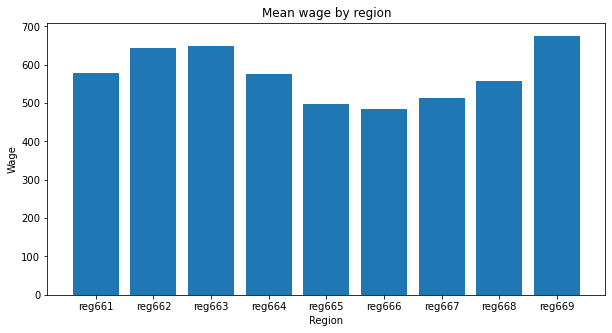

In [38]:
plt.figure(figsize=(10,5))
plt.bar(reg66_2, regMean)
plt.title('Mean wage by region')
plt.xlabel('Region')
plt.ylabel('Wage')
plt.show()

In [34]:
regMax = [max(df[df[reg] == 1].wage.tolist()) for reg in reg66_2]
regMin = [min(df[df[reg] == 1].wage.tolist()) for reg in reg66_2]

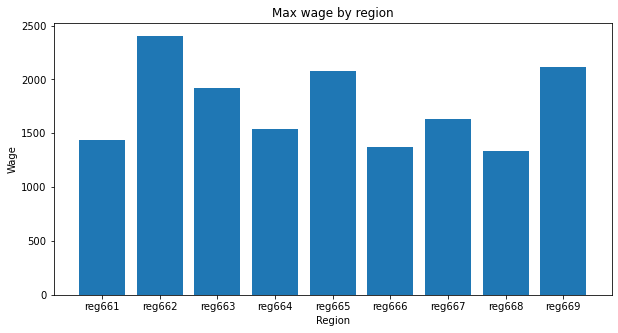

In [39]:
plt.figure(figsize=(10,5))
plt.bar(reg66_2, regMax)
plt.title('Max wage by region')
plt.xlabel('Region')
plt.ylabel('Wage')
plt.show()

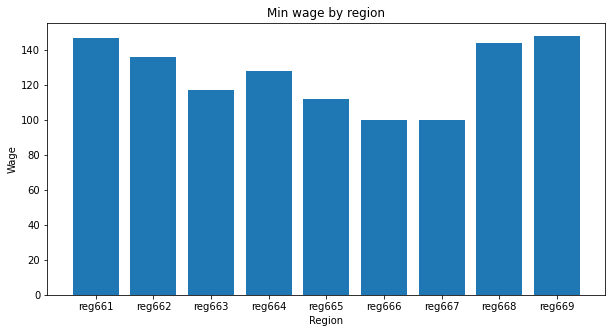

In [40]:
plt.figure(figsize=(10,5))
plt.bar(reg66_2, regMin)
plt.title('Min wage by region')
plt.xlabel('Region')
plt.ylabel('Wage')
plt.show()

In [45]:
totalPeople = [len(df[df[reg] == 1]) for reg in reg66_2]
totalPeople

([140, 484, 589, 193, 627, 289, 331, 85, 272], 3010)

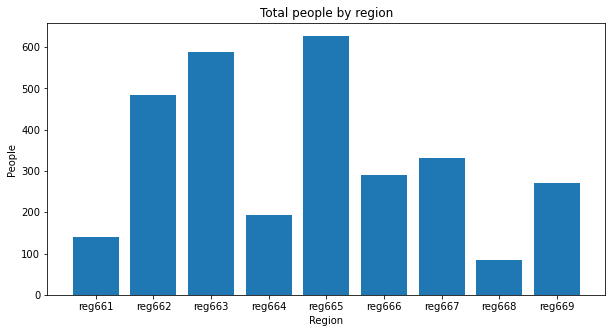

In [46]:
plt.figure(figsize=(10,5))
plt.bar(reg66_2, totalPeople)
plt.title('Total people by region')
plt.xlabel('Region')
plt.ylabel('People')
plt.show()